In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
file_path = 'Resources/annualweather.csv'
weather_df = pd.read_csv(file_path, low_memory=False)

weather_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Orlando,2023-05-01,86.0,64.7,74.1,84.8,64.7,73.9,56.5,57.2,...,25.8,10,10,2023-05-01T06:45:00,2023-05-01T20:00:42,0.37,Clear,Clear conditions throughout the day.,clear-day,"72205312841,1341W,72205712854,72205012815,KISM..."
1,Orlando,2023-05-02,87.1,66.6,76.4,86.5,66.6,76.3,60.7,60.8,...,26.0,10,10,2023-05-02T06:44:10,2023-05-02T20:01:18,0.40,Clear,Clear conditions throughout the day.,clear-day,"72205312841,1341W,72205712854,72205012815,KISM..."
2,Orlando,2023-05-03,86.0,69.0,75.5,82.7,69.0,74.9,51.8,49.9,...,25.1,9,10,2023-05-03T06:43:21,2023-05-03T20:01:55,0.43,Clear,Clear conditions throughout the day.,clear-day,"72205312841,1341W,72205712854,72205012815,KISM..."
3,Orlando,2023-05-04,86.0,63.7,75.3,83.3,63.7,74.5,51.3,46.3,...,25.9,9,10,2023-05-04T06:42:33,2023-05-04T20:02:31,0.47,Clear,Clear conditions throughout the day.,clear-day,"72205312841,1341W,72205712854,72205012815,KISM..."
4,Orlando,2023-05-05,87.0,65.9,75.2,87.1,65.9,75.3,58.8,57.7,...,19.9,9,10,2023-05-05T06:41:47,2023-05-05T20:03:07,0.50,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"72205312841,1341W,72205712854,72205012815,KISM..."


In [7]:
weather_reduced_columns = weather_df[["name","datetime","conditions"]]
weather_reduced_columns

,name,datetime,conditions
0,Orlando,2023-05-01,Clear
1,Orlando,2023-05-02,Clear
2,Orlando,2023-05-03,Clear
3,Orlando,2023-05-04,Clear
4,Orlando,2023-05-05,Partially cloudy
...,...,...,...
362,Orlando,2024-04-27,"Rain, Partially cloudy"
363,Orlando,2024-04-28,Partially cloudy
364,Orlando,2024-04-29,Partially cloudy
365,Orlando,2024-04-30,Partially cloudy


In [8]:
file_path = 'Resources/disneysearch.csv'
disney_df = pd.read_csv(file_path, low_memory=False)

disney_df.head()

,week,search
0,2023-04-30,69
1,2023-05-07,68
2,2023-05-14,70
3,2023-05-21,75
4,2023-05-28,69


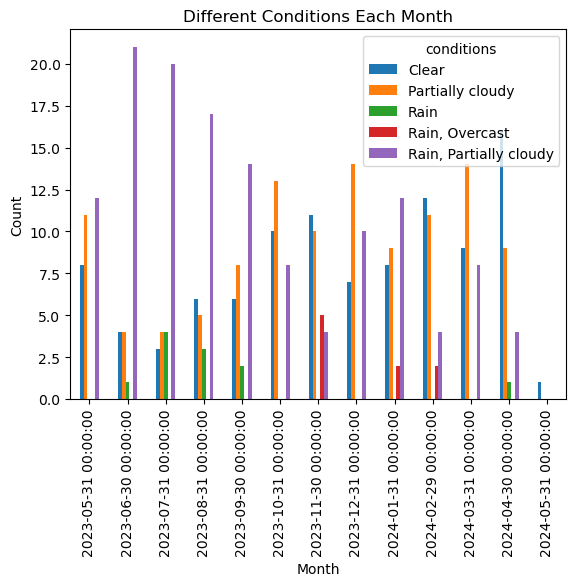

In [101]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Group the DataFrame by month and condition
grouped_data = weather_df.groupby([pd.Grouper(key='datetime', freq='M'), 'conditions'])

# Count the number of occurrences for each month and condition
monthly_conditions_count = grouped_data.size().unstack(fill_value=0)

# Plot the data as a bar graph
monthly_conditions_count.plot(kind='bar')

# Set the title and labels
plt.title('Different Conditions Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Show the plot
plt.show()

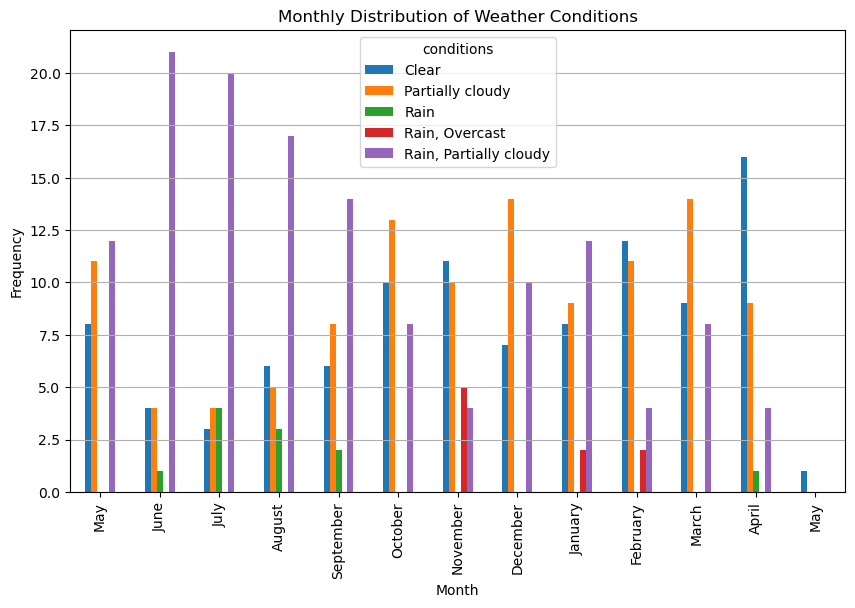

In [164]:

# Convert 'datetime' column to datetime type
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Group the DataFrame by month and condition, and count occurrences
monthly_conditions_count = weather_df.groupby([pd.Grouper(key='datetime', freq='M'), 'conditions']).size().unstack(fill_value=0)

# Plot the data as a bar graph with a more informative title and labels
monthly_conditions_count.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Distribution of Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Frequency')

# Set the x-axis tick labels to display the month names
month_names = monthly_conditions_count.index.month_name()
plt.xticks(range(len(month_names)), month_names)

# Show the plot with a grid for better readability
plt.grid(axis='y')
plt.show()

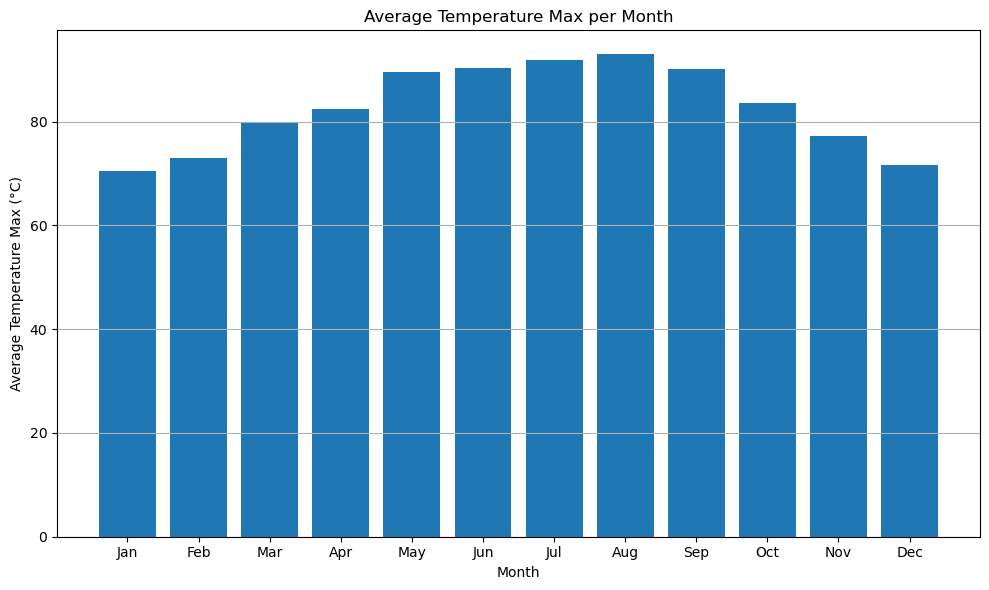

In [21]:
# Convert 'datetime' column to datetime type
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Group the DataFrame by month and calculate the average tempmax
monthly_tempmax_avg = weather_df.groupby(pd.Grouper(key='datetime', freq='M'))['tempmax'].mean().reset_index()

# Plot the data as a bar graph with a more informative title and labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_tempmax_avg['datetime'].dt.month, monthly_tempmax_avg['tempmax'])
ax.set_title('Average Temperature Max per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Temperature Max (°C)')

# Set the x-axis tick labels to display the month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)

# Show the plot with a grid for better readability
ax.grid(axis='y')
plt.tight_layout()
plt.show()

In [102]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Group the DataFrame by month
grouped_data = weather_df.groupby(pd.Grouper(key='datetime', freq='M'))

# Perform an operation on the grouped data (e.g., sum the 'value' column)
result = grouped_data['conditions'].sum()

# Print the result
print(result)

datetime
2023-05-31    ClearClearClearClearPartially cloudyPartially ...
2023-06-30    Rain, Partially cloudyPartially cloudyRain, Pa...
2023-07-31    ClearClearRain, Partially cloudyRain, Partiall...
2023-08-31    ClearRain, Partially cloudyPartially cloudyRai...
2023-09-30    Rain, Partially cloudyPartially cloudyPartiall...
2023-10-31    Rain, Partially cloudyRain, Partially cloudyRa...
2023-11-30    Partially cloudyClearPartially cloudyPartially...
2023-12-31    Partially cloudyPartially cloudyPartially clou...
2024-01-31    Partially cloudyClearRain, Partially cloudyRai...
2024-02-29    ClearClearClearRain, Partially cloudyPartially...
2024-03-31    Partially cloudyPartially cloudyRain, Partiall...
2024-04-30    ClearPartially cloudyRain, Partially cloudyCle...
2024-05-31                                                Clear
Freq: M, Name: conditions, dtype: object


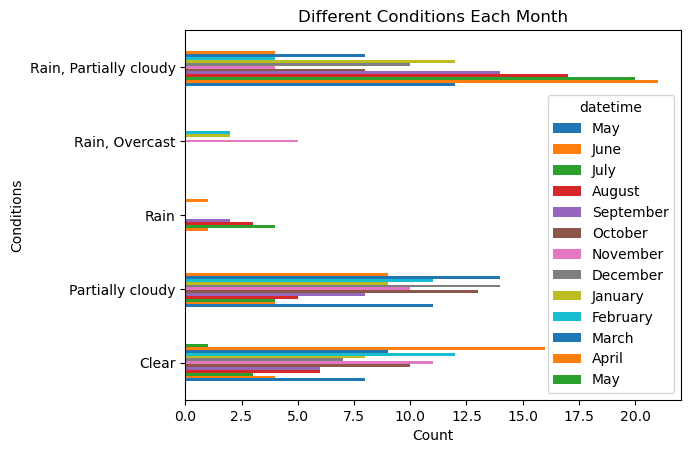

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the datetime column to datetime format
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Group the DataFrame by month and condition
grouped_data = weather_df.groupby([pd.Grouper(key='datetime', freq='M'), 'conditions'])

# Count the number of occurrences for each month and condition
monthly_conditions_count = grouped_data.size().unstack(fill_value=0)

# Set the index to the month name only
monthly_conditions_count.index = monthly_conditions_count.index.strftime('%B')

# Transpose the DataFrame
monthly_conditions_count = monthly_conditions_count.transpose()

# Plot the data as a horizontal bar graph
monthly_conditions_count.plot(kind='barh')

# Set the title and labels
plt.title('Different Conditions Each Month')
plt.xlabel('Count')
plt.ylabel('Conditions')

# Show the plot
plt.show()

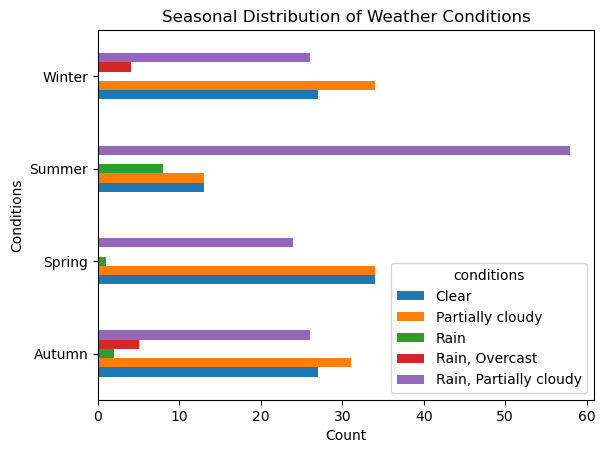

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def get_season(date):
    """
    Get the season for a given date.
    """
    month = date.month
    if month in (12, 1, 2):
        return 'Winter'
    elif month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    else:
        return 'Autumn'

def prepare_seasonal_weather_data(weather_data):
    """
    Prepare seasonal weather data for visualization.
    """
    # Convert the datetime column to datetime format
    weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

    # Add a season column to the DataFrame
    weather_df['season'] = weather_df['datetime'].apply(get_season)

    # Group the DataFrame by season and condition
    grouped_data = weather_df.groupby([weather_df['season'], 'conditions'])

    # Count the number of occurrences for each season and condition
    seasonal_conditions_count = grouped_data.size().unstack(fill_value=0)

    return seasonal_conditions_count

def visualize_seasonal_weather_data(seasonal_conditions_count):
    """
    Visualize seasonal weather data as a horizontal bar graph.
    """
    # Plot the data as a horizontal bar graph
    seasonal_conditions_count.plot(kind='barh')

    # Set the title and labels
    plt.title('Seasonal Distribution of Weather Conditions')
    plt.xlabel('Count')
    plt.ylabel('Conditions')

    # Show the plot
    plt.show()

# Prepare and visualize the data
seasonal_conditions_count = prepare_seasonal_weather_data(weather_df)
visualize_seasonal_weather_data(seasonal_conditions_count)

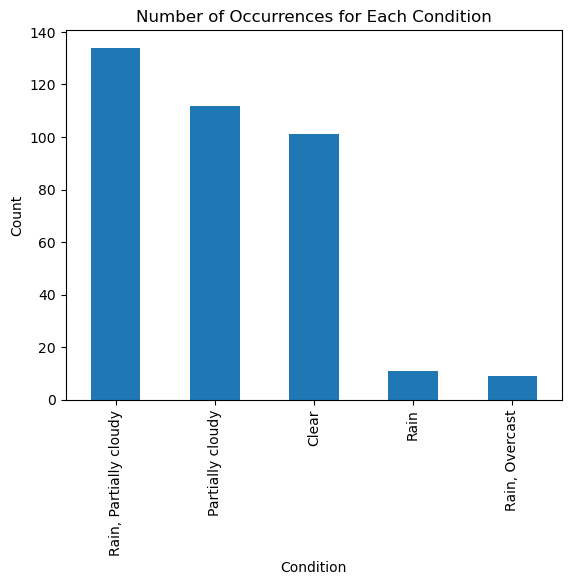

In [104]:
# Create the Disney search DataFrame
disney_df['week'] = pd.to_datetime(disney_df['week'])
disney_grouped_data = disney_df.groupby([pd.Grouper(key='week', freq='M'), 'search'])
disney_

<Figure size 640x480 with 0 Axes>

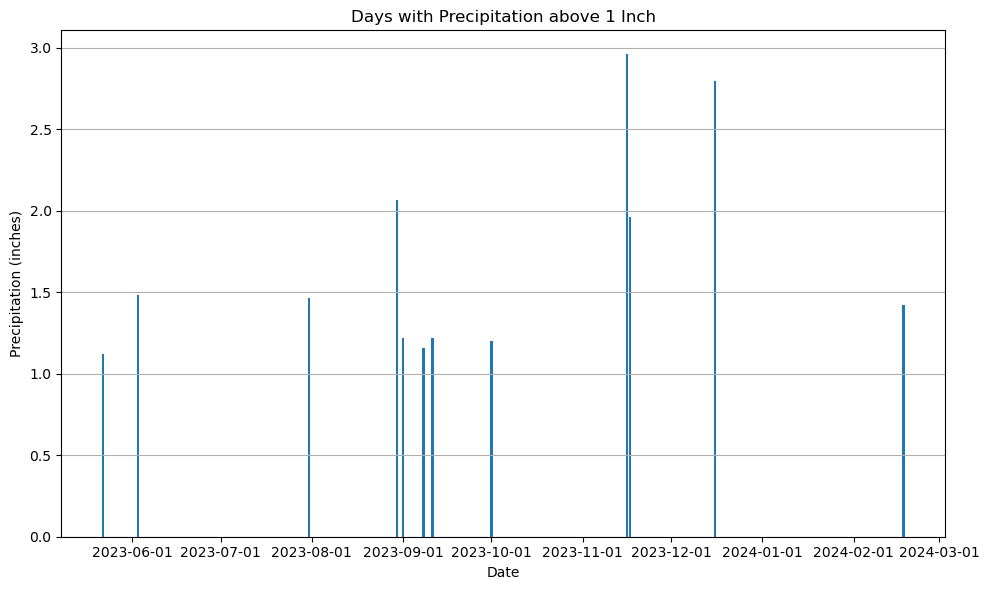

In [105]:
# Filter data to only include days with precipitation above 1 inch
weather_df_filtered = weather_df[weather_df['precip'] > 1]

# Create a new DataFrame with the date and precipitation values
precipitation_data = weather_df_filtered[['datetime', 'precip']]

# Reset the index of the DataFrame to use 'datetime' as a column
precipitation_data.reset_index(inplace=True)

# Format the x-axis with date labels
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gcf().autofmt_xdate()

# Plot the data as a bar graph with a more informative title and labels
plt.figure(figsize=(10, 6))
plt.bar(precipitation_data['datetime'], precipitation_data['precip'])
plt.title('Days with Precipitation above 1 Inch')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(axis='y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()

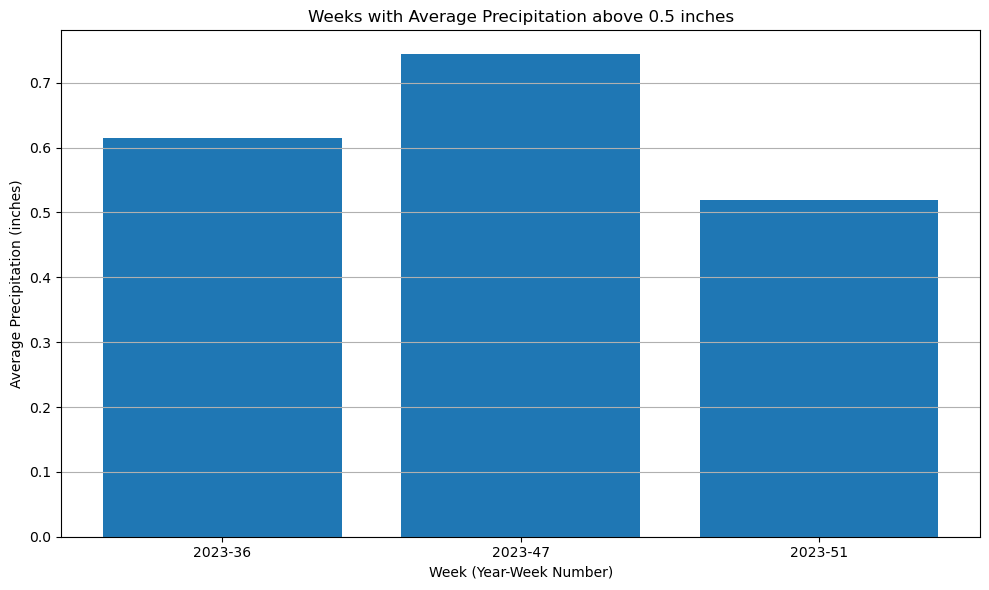

In [127]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Group the data by week and calculate the mean precipitation
weekly_precipitation = weather_df.groupby(weather_df['datetime'].dt.to_period('W'))['precip'].mean()

# Filter the data to only include weeks with average precipitation above 0.5
weekly_precipitation_filtered = weekly_precipitation[weekly_precipitation > 0.5]

# Extract the year and week number from the datetime index
weekly_precipitation_filtered.index = weekly_precipitation_filtered.index.strftime('%Y-%U')

# Plot the data as a bar graph with a more informative title and labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(weekly_precipitation_filtered.index, weekly_precipitation_filtered.values)
ax.set_title('Weeks with Average Precipitation above 0.5 inches')
ax.set_xlabel('Week (Year-Week Number)')
ax.set_ylabel('Average Precipitation (inches)')
ax.grid(axis='y')
plt.tight_layout()
plt.show()

In [10]:
disney_df['week'] = pd.to_datetime(disney_df['week'], errors='coerce')

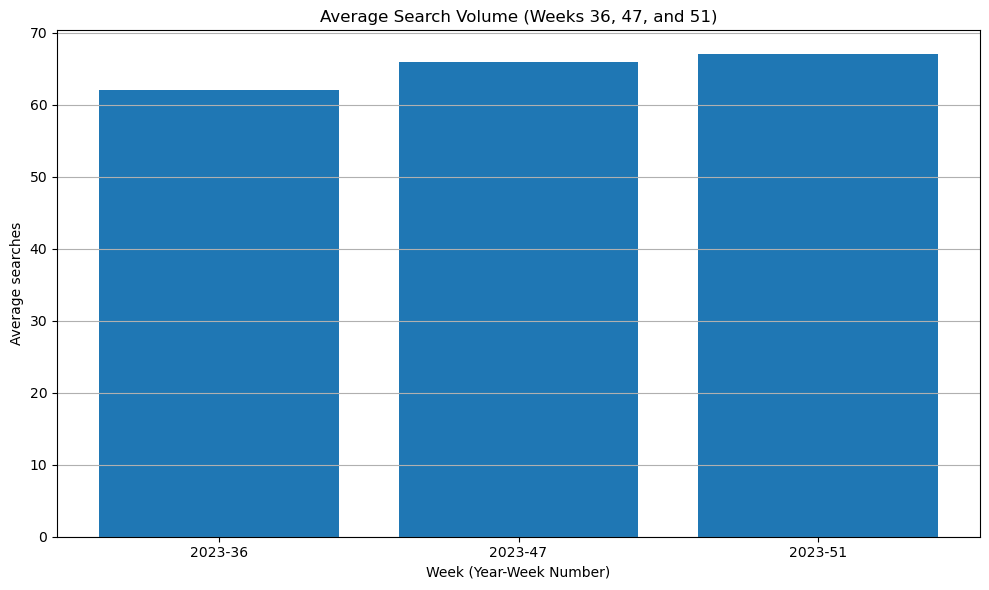

In [7]:
# Group the data by week and calculate the mean precipitation
weekly_searches = disney_df.groupby(disney_df['week'].dt.to_period('W'))['search'].mean()

# Extract the year and week number from the datetime index
weekly_searches.index = weekly_searches.index.to_series().dt.strftime('%Y-%U')

# Define the weeks to show as a list of strings
weeks_to_show = ['-36', '-47', '-51']

# Filter the data to only include the specified weeks
weekly_searches_filtered = weekly_searches[weekly_searches.index.str.contains('|'.join(weeks_to_show))]

# Plot the data as a bar graph with a more informative title and labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(weekly_searches_filtered.index, weekly_searches_filtered.values)
ax.set_title('Average Search Volume (Weeks 36, 47, and 51)')
ax.set_xlabel('Week (Year-Week Number)')
ax.set_ylabel('Average searches')
ax.grid(axis='y')
plt.tight_layout()
plt.show()

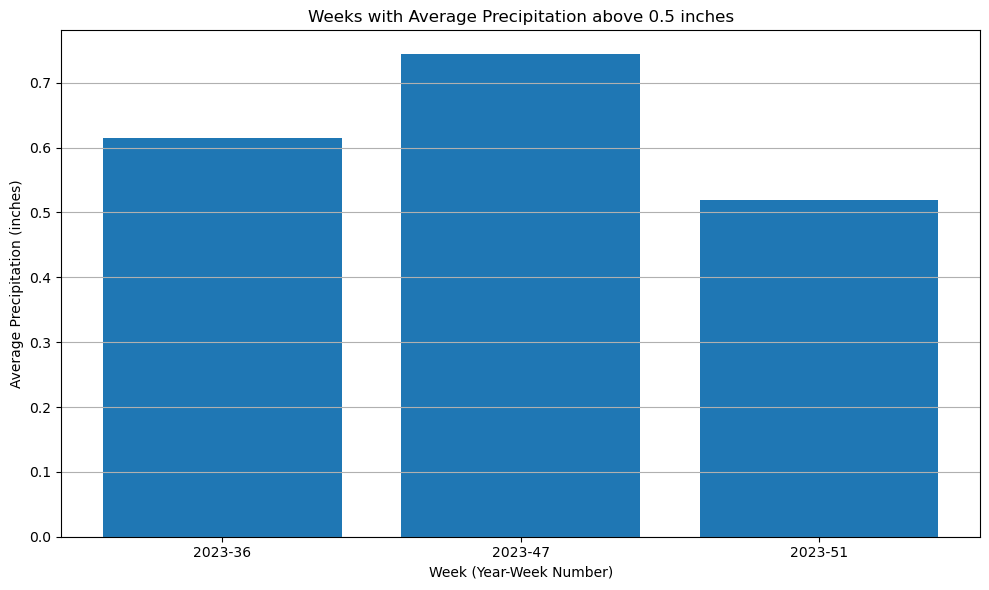

In [209]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Group the data by week and calculate the mean precipitation
weekly_precipitation = weather_df.groupby(weather_df['datetime'].dt.to_period('W'))['precip'].mean()

# Filter the data to only include weeks with average precipitation above 0.5
weekly_precipitation_filtered = weekly_precipitation[weekly_precipitation > 0.5]

# Extract the year and week number from the datetime index
weekly_precipitation_filtered.index = weekly_precipitation_filtered.index.strftime('%Y-%U')

# Plot the data as a bar graph with a more informative title and labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(weekly_precipitation_filtered.index, weekly_precipitation_filtered.values)
ax.set_title('Weeks with Average Precipitation above 0.5 inches')
ax.set_xlabel('Week (Year-Week Number)')
ax.set_ylabel('Average Precipitation (inches)')
ax.grid(axis='y')
plt.tight_layout()
plt.show()

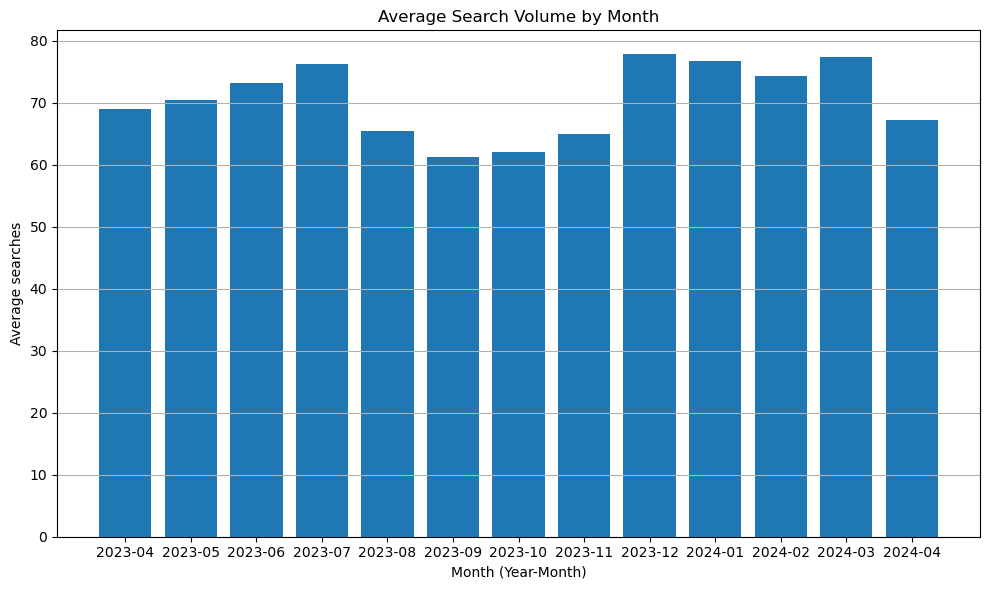

In [11]:
# Group the data by month and calculate the mean precipitation
monthly_searches = disney_df.resample('M', on='week')['search'].mean()

# Extract the year and month from the datetime index
monthly_searches.index = monthly_searches.index.strftime('%Y-%m')

# Plot the data as a bar graph with a more informative title and labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_searches.index, monthly_searches.values)
ax.set_title('Average Search Volume by Month')
ax.set_xlabel('Month (Year-Month)')
ax.set_ylabel('Average searches')
ax.grid(axis='y')
plt.tight_layout()
plt.show()

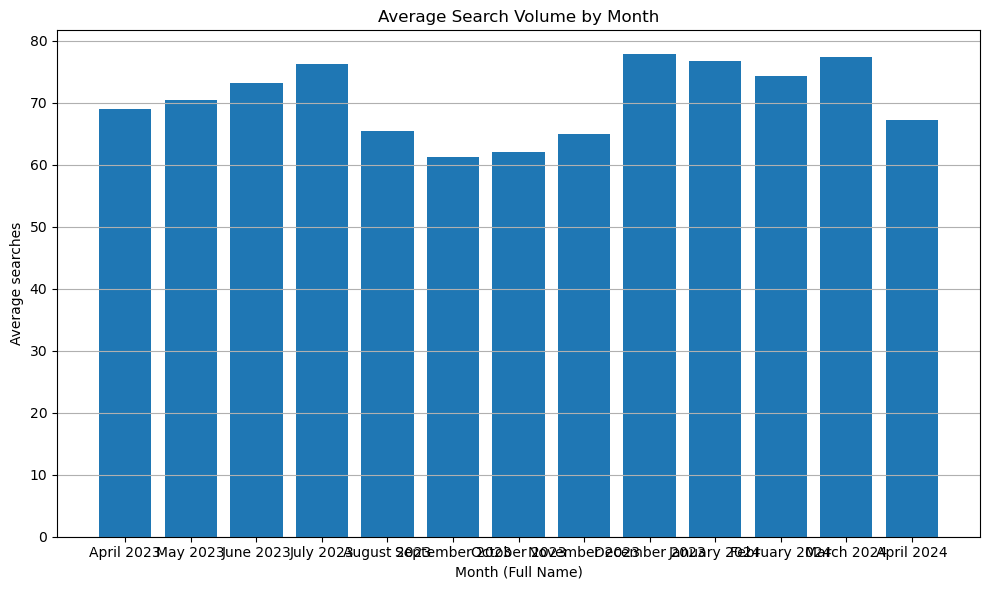

In [12]:
# Group the data by month and calculate the mean precipitation
monthly_searches = disney_df.resample('M', on='week')['search'].mean()

# Extract the year and month from the datetime index
monthly_searches.index = monthly_searches.index.strftime('%B %Y')

# Plot the data as a bar graph with a more informative title and labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_searches.index, monthly_searches.values)
ax.set_title('Average Search Volume by Month')
ax.set_xlabel('Month (Full Name)')
ax.set_ylabel('Average searches')
ax.grid(axis='y')
plt.tight_layout()
plt.show()


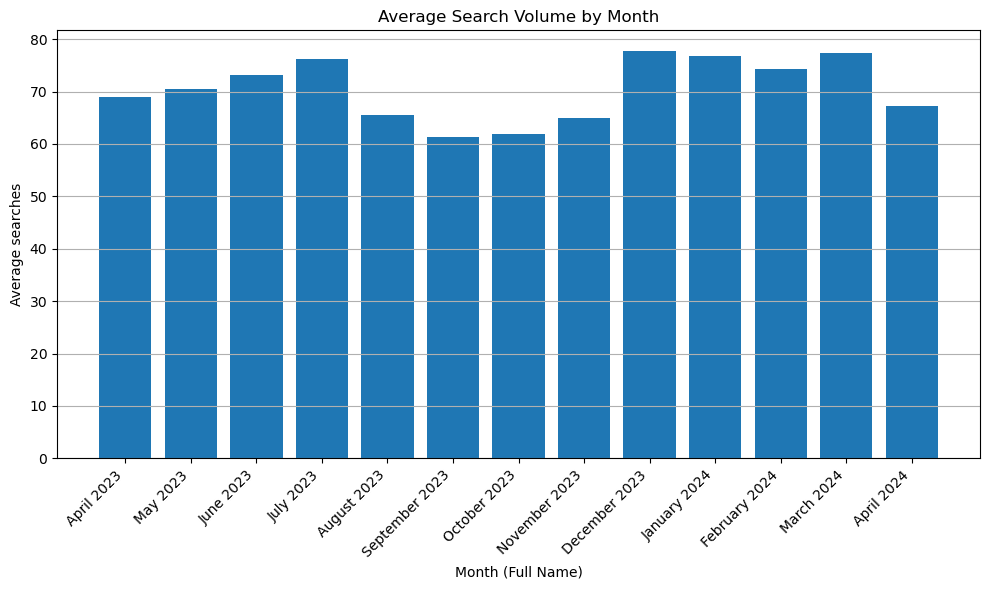

In [14]:

# Group the data by month and calculate the mean precipitation
monthly_searches = disney_df.resample('M', on='week')['search'].mean()

# Extract the year and month from the datetime index
monthly_searches.index = monthly_searches.index.strftime('%B %Y')

# Plot the data as a bar graph with a more informative title and labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_searches.index, monthly_searches.values)
ax.set_title('Average Search Volume by Month')
ax.set_xlabel('Month (Full Name)')
ax.set_ylabel('Average searches')
ax.grid(axis='y')

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
